In [10]:
import numpy as np
import mediapipe as mp
import matplotlib.pyplot as plt
from scipy.interpolate import InterpolatedUnivariateSpline
plt.style.use(['science', 'notebook', 'grid'])

In [11]:
import sys
sys.path.append("C:\\Users\\Cian\\1 FYP Code\\Code_with_git\\Functions")
from Functions import detectPose, extract_angles, moving_average

In [21]:
# path = "C:\\Users\\Cian\\OneDrive\\Documents\\Imperial\\Year 4\\FYP\\Local Download\\Technical\\Bicep Curl Analysis\\Technique Modelling\\Training Data (Videos)\\Incorrect Technique (for validation)\\2.mp4"
path = "C:\\Users\\Cian\\Downloads\\Testing.mp4"
Angles = extract_angles(path)

- List1 = times at which the class changes (concentric to eccentric for example).
- List2 = the class that is seen between the times in the corresponding index and the next in List1.

In [63]:
#This is for the video called 2 in the file called Incorrect Technique (for validation)
# list1 = [0.79,1.52,2.88,3.63,5.2,6.19,7.61,8.72,10.06,11.02]
# list2 = [1,2,1,2,1,2,1,2,1]

In [ ]:
#The following are the lists for each curl repetition in the video called "Testing" within the file called "Training Data (Videos)"

# list1 = [1.89, 2.84, 3.79]
# list2 = [1,2]
# list1 = [6.38, 7.33, 8.52]
# list2 = [1,2]
# list1 = [10.26, 11.22, 12.31]
# list2 = [1,2]
# list1 = [14.83, 16.00, 17.27]
# list2 = [1,2]
# list1 = [18.66,20.20,21.60]
# list2 = [1,2]
# list1 = [27.11,28.30,30]
# list2 = [1,2]
# list1 = [32.16,33.46,34.71]
# list2 = [1,2]
# list1 = [39.47,40.52,42.34]
# list2 = [1,2]
list1 = [45.19,46.5,47.85]
list2 = [1,2]

In [64]:
concentric = []
eccentric = []

concentric_time = []
eccentric_time = []

for i in range(len(list2)):
    #first treat a concentric contraction
    if list2[i]==1:
        start = int(list1[i]*15) #multiply by 15 because the video is 15 fps
        end = int(list1[i+1]*15)
        trajectory = Angles[start:end]
        concentric.append(trajectory)
        concentric_time.append(np.linspace(0,1,len(trajectory)))
        
    #now treat eccentric contraction
    elif list2[i]==2:
        start = int(list1[i]*15) #multiply by 15 because the video is 15 fps
        end = int(list1[i+1]*15)
        eccentric.append(trajectory)
        eccentric_time.append(np.linspace(0,1,len(trajectory)))

In [65]:
def equal_lengths(Data, Time, sequence_length):
    #The data is three dimensional, therefore interpolate each dimension separately.
    X = Data[:,0]
    Y = Data[:,1]
    Z = Data[:,2]
    
    X_interp = InterpolatedUnivariateSpline(Time, X, k=3)
    Y_interp = InterpolatedUnivariateSpline(Time, Y, k=3)
    Z_interp = InterpolatedUnivariateSpline(Time, Z, k=3)
    
    #Now sample the data at time intervals dt then re-combine
    t = np.linspace(0,1,sequence_length)
    x = X_interp(t)
    y = Y_interp(t)
    z = Z_interp(t)
    equal_length_data = np.stack((x,y,z),axis=1)
    
    #Return the data and the normalised time
    return equal_length_data

In [66]:
sequence_length = 15

#now since all the sequences will be the same length we can store them all in a numpy array
equal_concentric = np.zeros((len(concentric), sequence_length, 3))
equal_eccentric = np.zeros((len(eccentric), sequence_length, 3))
#note that we don't need to save the time series since we can easily reproduce it, between zero and 1 with sequence_length amount of points.

#Loop through the concentric, filling in the corresponding array
for i in range(len(concentric)):
    D_con = equal_lengths(concentric[i],concentric_time[i],sequence_length)
    equal_concentric[i] = D_con
    
#Loop through the eccentric, filling in the corresponding array
for i in range(len(eccentric)):
    D_ecc = equal_lengths(eccentric[i],eccentric_time[i],sequence_length)
    equal_eccentric[i] = D_ecc

In [67]:
np.save("C:\\Users\\Cian\\1 FYP Code\\Code_with_git\\Technique Modelling\\Bicep Curl\\Perfect Technique Modelling\\Training Data\\incorrectConc11.npy", equal_concentric)
np.save("C:\\Users\\Cian\\1 FYP Code\\Code_with_git\\Technique Modelling\\Bicep Curl\\Perfect Technique Modelling\\Training Data\\incorrectEcc11.npy", equal_eccentric)

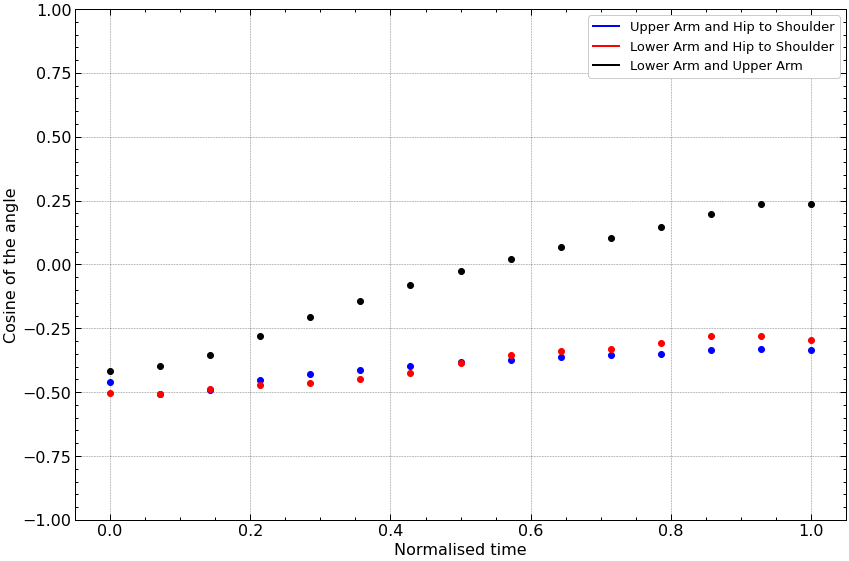

In [18]:
time = np.linspace(0,1,sequence_length)
plt.figure(figsize=(12,8))
for i in range(len(concentric)):
    plt.scatter(time, equal_concentric[i,:,0],c='b')
    plt.scatter(time, equal_concentric[i,:,1],c='r')
    plt.scatter(time, equal_concentric[i,:,2],c='black')
#     plt.scatter(time, equal_eccentric[i,:,0],c='b')
#     plt.scatter(time, equal_eccentric[i,:,1],c='r')
#     plt.scatter(time, equal_eccentric[i,:,2],c='black')
plt.ylabel('Normalised Angle')
plt.xlabel('Normalised time')
labels = ['Torso Angle', 'Upper Arm Angle', 'Lower Arm Angle']
legend_elements = [plt.Line2D([0], [0], color='b', label=labels[0]), plt.Line2D([0], [0], color='r', label=labels[1]), plt.Line2D([0], [0], color='black', label=labels[2])]
plt.ylim(-1,1)

plt.legend(handles=legend_elements,fontsize=13)
plt.tight_layout()
plt.savefig("C:\\Users\\Cian\\Downloads\\FIG1.png")